In [4]:
pip install ucimlrepo pandas wordcloud matplotlib seaborn 


Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.0/797.0 kB 3.2 MB/s eta 0:00:0000:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


In [3]:
spambase = fetch_ucirepo(id=94)


In [4]:
data = pd.DataFrame(spambase.data.features, columns=spambase.data.feature_names)
labels = spambase.data.targets
labels1 = labels.squeeze()




In [5]:
data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [10]:
print(data.isna().sum())


word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [12]:
labels1

0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: Class, Length: 4601, dtype: int64

In [11]:
print(labels1.isnull().sum())

0


In [13]:
print(data.head())
print(data.describe())
print(data.info())



   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  word_freq_conference  char_freq_;  \
0             0.00            0.00  ...                   0.0 

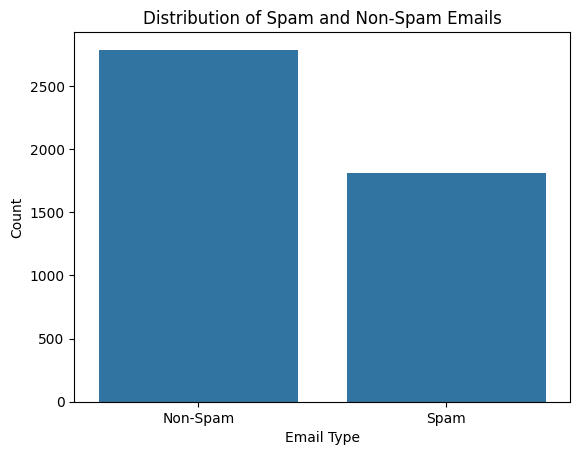

In [6]:
sns.countplot(x=labels1)
plt.title('Distribution of Spam and Non-Spam Emails')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Spam', 'Spam'])
plt.show()


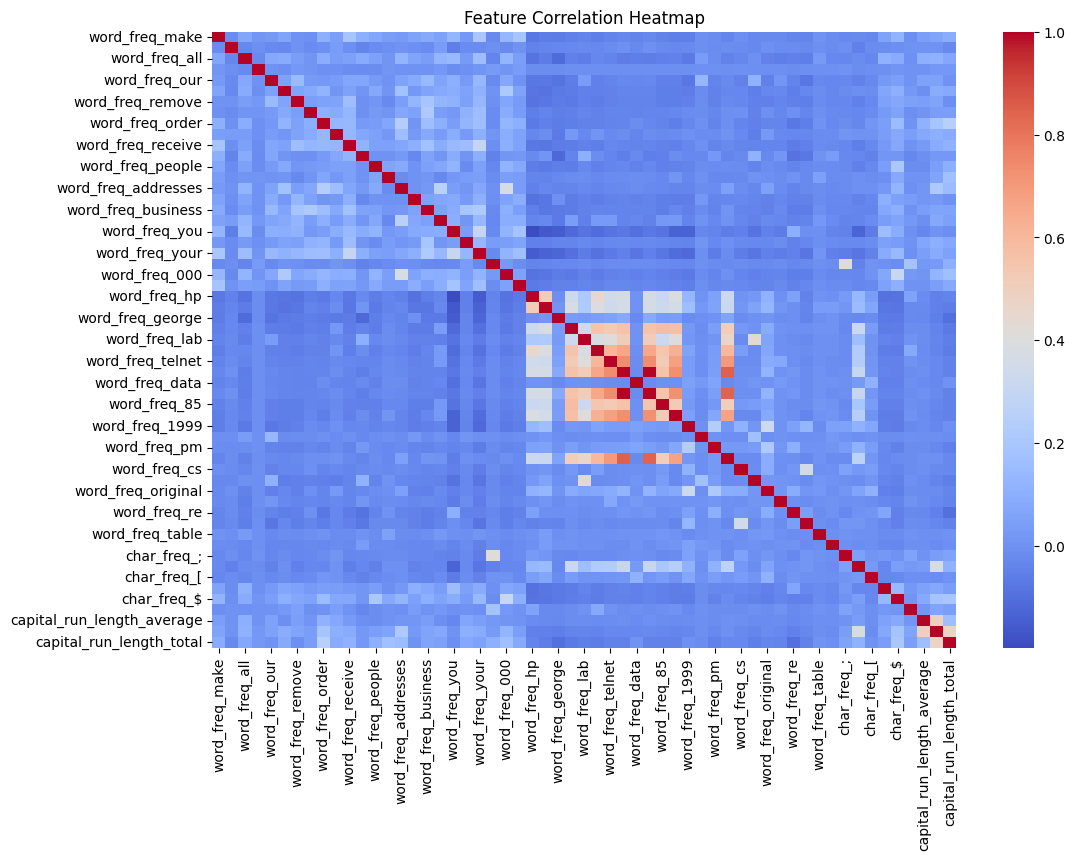

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


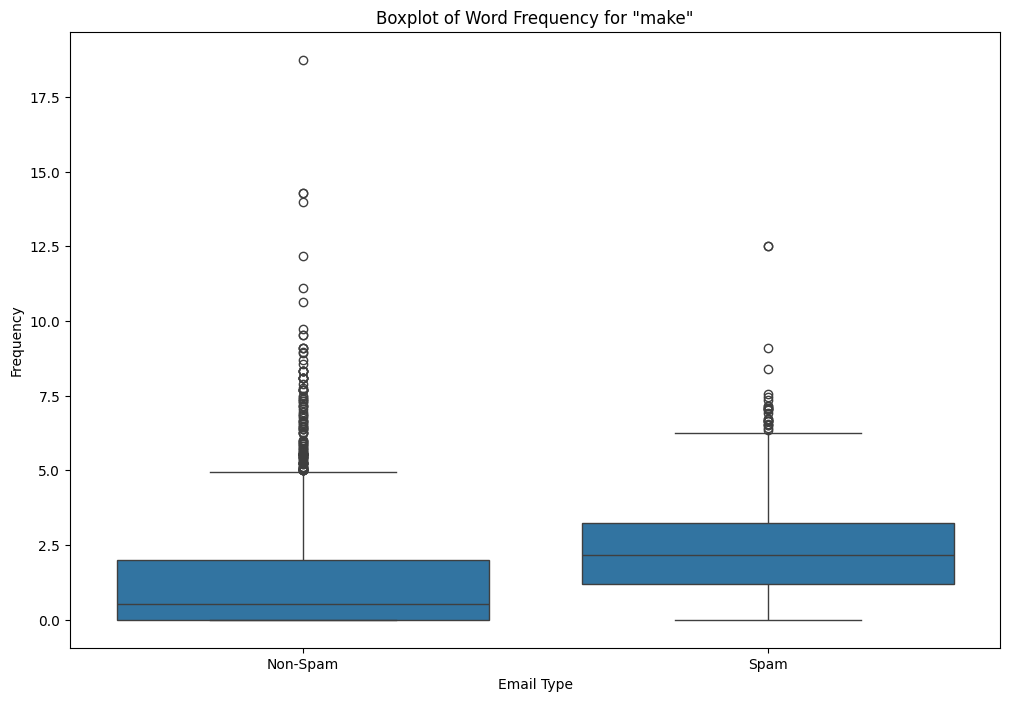

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=labels1, y=data['word_freq_you'])  
plt.title('Boxplot of Word Frequency for "you"')
plt.xlabel('Email Type')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Non-Spam', 'Spam'])
plt.show()


Modeling

In [20]:
from sklearn.model_selection import train_test_split
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy

In [16]:
#Add the labels to the data, creating a new column to ensure each row in our data has its corresponding label.


data['labels'] = labels


In [34]:
data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,labels
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [17]:
#Iterate through each row, combining data and labels into a dictionary format that nltk likes.


features = []
for index, row in data.iterrows():
    features.append((dict(row.drop('labels')), row['labels']))


In [32]:
#Separate the data into training and testing sets, where the first 500 examples are for testing and the rest are for training.


train_set, test_set = features[500:], features[:500]


In [33]:
classifier = NaiveBayesClassifier.train(train_set)

#Test the model’s performance by checking how well it predicts on the test set. 
print(f'Accuracy: {accuracy(classifier, test_set)}')



Accuracy: 0.706


In [23]:
classifier.show_most_informative_features(10)


Most Informative Features
capital_run_length_total = np.float64(5.0)    0.0 : 1.0    =     51.0 : 1.0
          word_freq_free = np.float64(0.32)    1.0 : 0.0    =     31.2 : 1.0
           word_freq_000 = np.float64(0.34)    1.0 : 0.0    =     27.2 : 1.0
          word_freq_will = np.float64(0.7)    1.0 : 0.0    =     24.7 : 1.0
         word_freq_money = np.float64(0.09)    1.0 : 0.0    =     24.0 : 1.0
capital_run_length_total = np.float64(6.0)    0.0 : 1.0    =     22.1 : 1.0
       word_freq_address = np.float64(0.2)    1.0 : 0.0    =     21.8 : 1.0
capital_run_length_total = np.float64(4.0)    0.0 : 1.0    =     20.7 : 1.0
         word_freq_email = np.float64(1.11)    1.0 : 0.0    =     20.7 : 1.0
           word_freq_000 = np.float64(0.36)    1.0 : 0.0    =     19.7 : 1.0
